# Arboles de decisión

En este código se hace uso del concepto de entropía como información para clasificar datos aleatorios y predecir resultados haciendo uso de la libreria Sklearn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

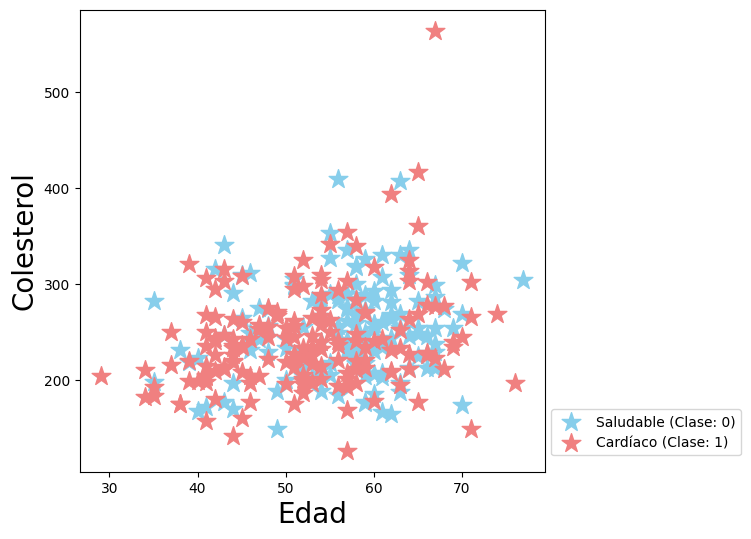

In [27]:
pacientes = pd.read_csv("pacientes.csv")
saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"],
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

Una entropía alta quiere decir que el conjutno de datos o el sistema tiene mucha información (o requiere información para ser descrito). Por el contrario, si la entropía es baja el sistema aporta poca información.

In [28]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 100, 100, 100])
print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))

40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    1.0
dtype: float64
2.0
0.0


Los datos tienen información de la edad y el nivel de colesterol de muchos pacientes clasificando como "0" si son saludables y "1" si están enfermos.

In [29]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"],
    test_size=0.30)

0.5444444444444444
|--- Edad <= 54.50
|   |--- Colesterol <= 262.50
|   |   |--- class: 1
|   |--- Colesterol >  262.50
|   |   |--- class: 1
|--- Edad >  54.50
|   |--- Colesterol <= 223.50
|   |   |--- class: 1
|   |--- Colesterol >  223.50
|   |   |--- class: 0



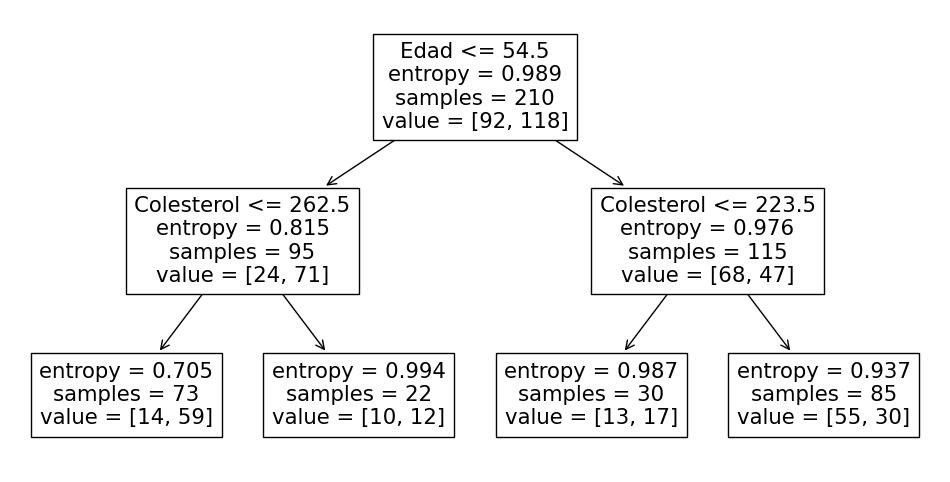

In [31]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",
                                             max_depth=2)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol,
              feature_names=["Edad", "Colesterol"])
plt.show()

Se ingresa un dato de prueba para predecir, según el modelo, si un nuevo paciente es saludable o enfermo

In [33]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
